
Best Parameters for Logistic Regression:
{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

Tuned Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       308
           1       0.60      0.63      0.62       136

    accuracy                           0.76       444
   macro avg       0.72      0.72      0.72       444
weighted avg       0.76      0.76      0.76       444

Confusion Matrix:
[[251  57]
 [ 50  86]]

Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       308
           1       0.59      0.60      0.60       136

    accuracy                           0.75       444
   macro avg       0.71      0.71      0.71       444
weighted avg       0.75      0.75      0.75       444

Confusion Matrix:
[[252  56]
 [ 54  82]]

Best Parameters for Gradient Boosting Trees:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_spli

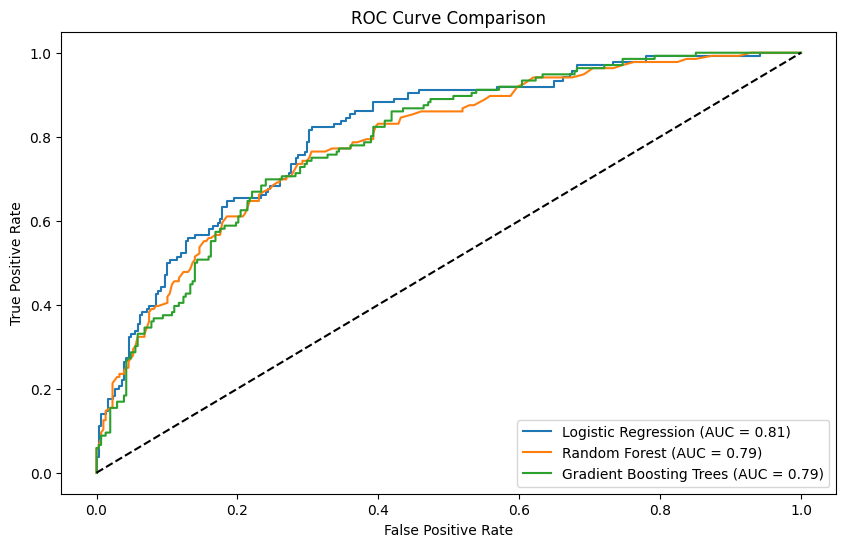

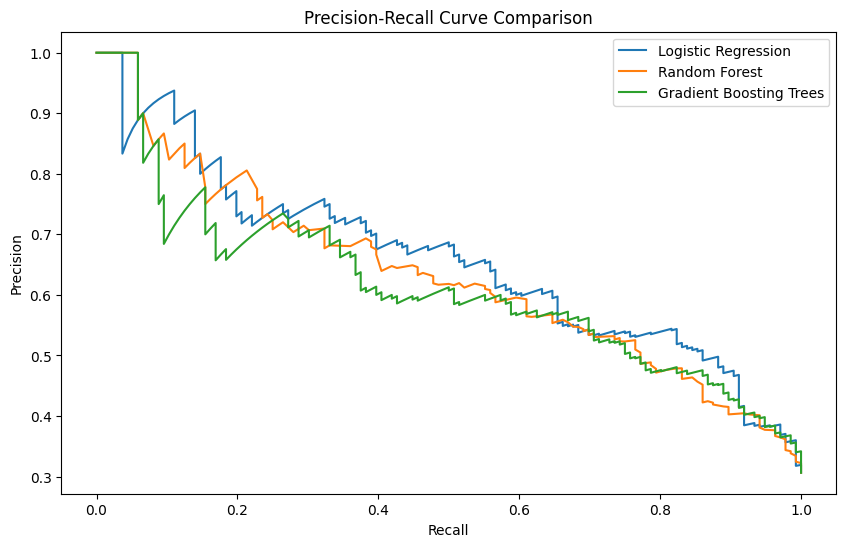

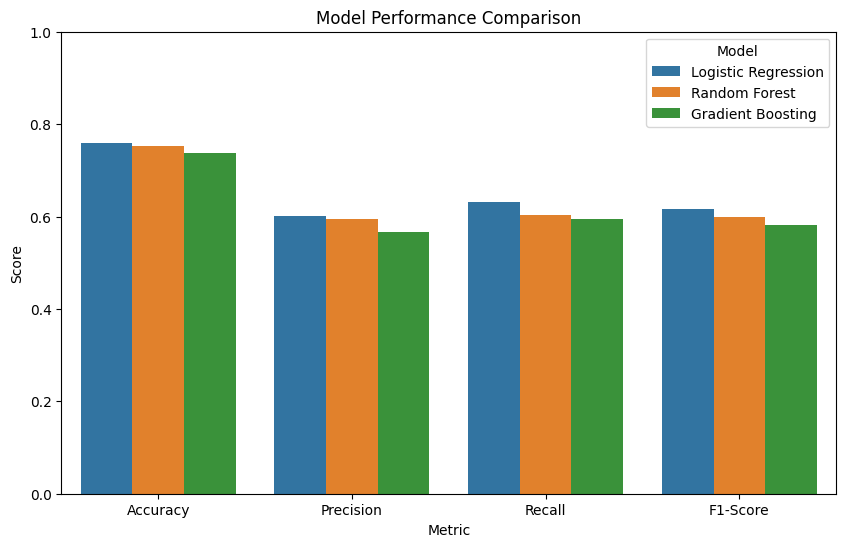

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/L

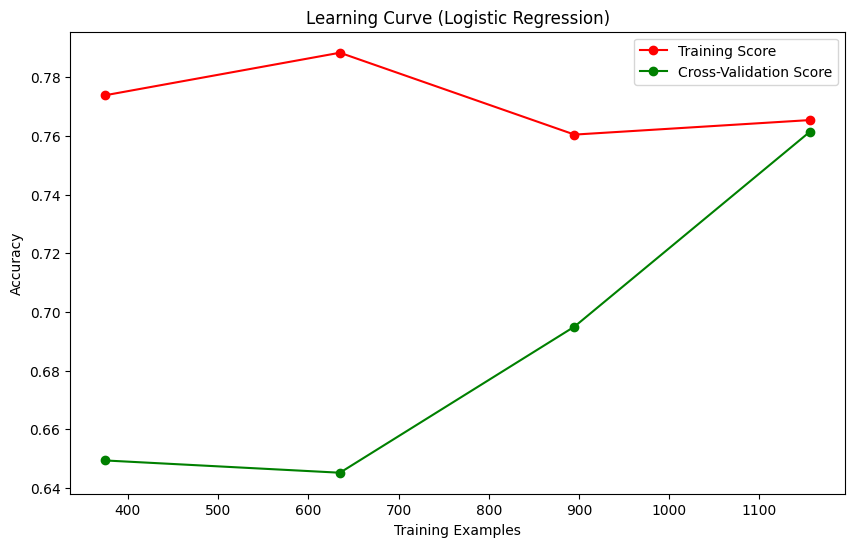

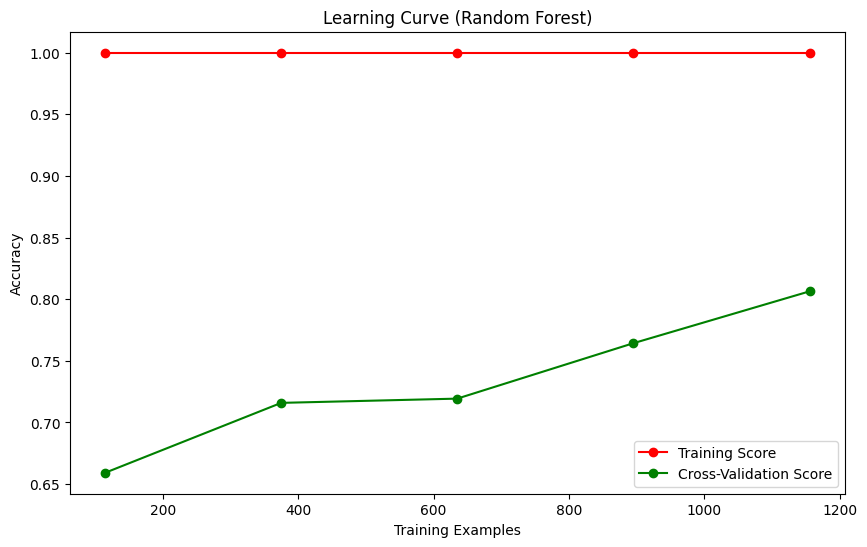

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/L

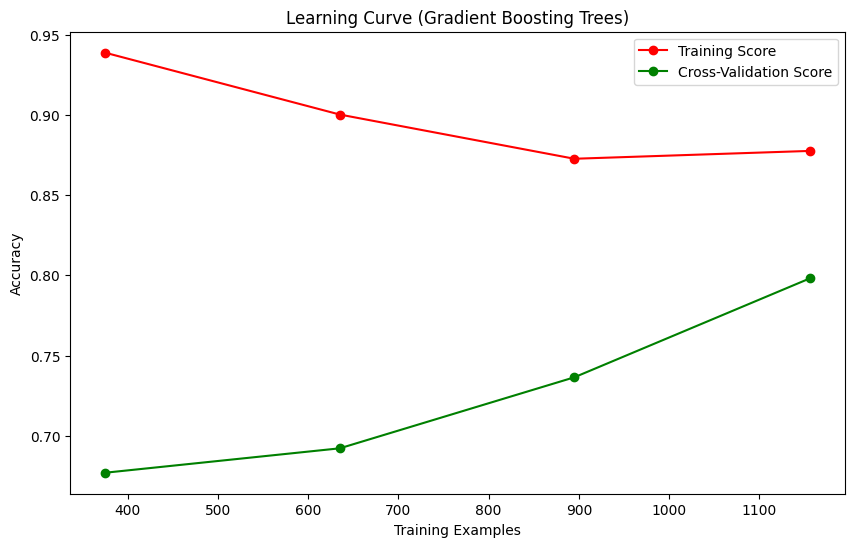

In [1]:
# Import necessary libraries
! pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
)
from imblearn.over_sampling import SMOTE

# Set matplotlib to display inline
%matplotlib inline

# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')  # Replace with your file path

# Handle missing values by dropping rows with missing values
df = df.dropna()

# Preprocessing: Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('attended', axis=1)
y = df['attended']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Assignment 1: Fine-Tune Hyperparameters for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_balanced, y_train_balanced)

print("\nBest Parameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Evaluate tuned Logistic Regression
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test_scaled)

print("\nTuned Logistic Regression Performance:")
print(classification_report(y_test, y_pred_best_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_lr))

# Random Forest (from provided code, using best parameters from previous tuning)
best_rf = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=200, random_state=42)
best_rf.fit(X_train_balanced, y_train_balanced)
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("\nTuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

# Assignment 1: Fine-Tune Hyperparameters for Gradient Boosting Trees
param_grid_gbt = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search_gbt = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbt, cv=5, scoring='accuracy')
grid_search_gbt.fit(X_train_balanced, y_train_balanced)

print("\nBest Parameters for Gradient Boosting Trees:")
print(grid_search_gbt.best_params_)

# Evaluate tuned Gradient Boosting Trees
best_gbt = grid_search_gbt.best_estimator_
y_pred_best_gbt = best_gbt.predict(X_test_scaled)

print("\nTuned Gradient Boosting Trees Performance:")
print(classification_report(y_test, y_pred_best_gbt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_gbt))

# Assignment 2: Additional Plots to Compare Model Performance

# ROC Curve Comparison
plt.figure(figsize=(10, 6))
# Logistic Regression
y_prob_lr = best_lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
# Random Forest
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
# Gradient Boosting Trees
y_prob_gbt = best_gbt.predict_proba(X_test_scaled)[:, 1]
fpr_gbt, tpr_gbt, _ = roc_curve(y_test, y_prob_gbt)
plt.plot(fpr_gbt, tpr_gbt, label=f'Gradient Boosting Trees (AUC = {roc_auc_score(y_test, y_prob_gbt):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve Comparison
plt.figure(figsize=(10, 6))
# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.plot(recall_rf, precision_rf, label='Random Forest')
# Gradient Boosting Trees
precision_gbt, recall_gbt, _ = precision_recall_curve(y_test, y_prob_gbt)
plt.plot(recall_gbt, precision_gbt, label='Gradient Boosting Trees')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='best')
plt.show()

# Bar Chart for Performance Metrics
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [accuracy_score(y_test, y_pred_best_lr), accuracy_score(y_test, y_pred_best_rf), accuracy_score(y_test, y_pred_best_gbt)]
precision = [precision_score(y_test, y_pred_best_lr), precision_score(y_test, y_pred_best_rf), precision_score(y_test, y_pred_best_gbt)]
recall = [recall_score(y_test, y_pred_best_lr), recall_score(y_test, y_pred_best_rf), recall_score(y_test, y_pred_best_gbt)]
f1 = [f1_score(y_test, y_pred_best_lr), f1_score(y_test, y_pred_best_rf), f1_score(y_test, y_pred_best_gbt)]

metrics = pd.DataFrame({
    'Model': models * 4,
    'Metric': ['Accuracy'] * 3 + ['Precision'] * 3 + ['Recall'] * 3 + ['F1-Score'] * 3,
    'Score': accuracy + precision + recall + f1
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

# Learning Curves (for completeness, as provided in original code)
def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend(loc="best")
    plt.show()

# Plot learning curves for all models
plot_learning_curve(best_lr, "Learning Curve (Logistic Regression)", X_train_balanced, y_train_balanced)
plot_learning_curve(best_rf, "Learning Curve (Random Forest)", X_train_balanced, y_train_balanced)
plot_learning_curve(best_gbt, "Learning Curve (Gradient Boosting Trees)", X_train_balanced, y_train_balanced)